In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [101]:
df = pd.read_csv("TCGA-BRCA.d0a1e510-1f13-4153-ab54-e813217d5704.gene_level_copy_number.v36__HIGH.tsv", sep='\t')

In [102]:
df.columns = [col.strip() for col in df.columns]

In [103]:
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['end'] = pd.to_numeric(df['end'], errors='coerce')
df['copy_number'] = pd.to_numeric(df['copy_number'], errors='coerce')
df['min_copy_number'] = pd.to_numeric(df['min_copy_number'], errors='coerce')
df['max_copy_number'] = pd.to_numeric(df['max_copy_number'], errors='coerce')

In [104]:
df.shape

(60623, 8)

In [105]:
print("Missing values before impute:")
print(df.isnull().sum())

Missing values before impute:
gene_id              0
gene_name            0
chromosome           0
start                0
end                  0
copy_number        407
min_copy_number    407
max_copy_number    407
dtype: int64


In [106]:
df['start'] = df['start'].ffill().bfill()
df['end'] = df['end'].ffill().bfill()

In [107]:
imputer = SimpleImputer(strategy='constant', fill_value=2)
copy_cols = ['copy_number', 'min_copy_number', 'max_copy_number']
df[copy_cols] = imputer.fit_transform(df[copy_cols])

In [108]:
print("\nMissing values after impute:")
df.isnull().sum()


Missing values after impute:


gene_id            0
gene_name          0
chromosome         0
start              0
end                0
copy_number        0
min_copy_number    0
max_copy_number    0
dtype: int64

In [109]:
df.dtypes

gene_id             object
gene_name           object
chromosome          object
start                int64
end                  int64
copy_number        float64
min_copy_number    float64
max_copy_number    float64
dtype: object

In [110]:
def classify(cn):
    if cn > 2:
        return "Amplified"
    elif cn < 2:
        return "Deleted"
    else:
        return "Normal"

df['CNV_Type'] = df['copy_number'].apply(classify)

In [111]:
df.head()

,gene_id,gene_name,chromosome,start,end,copy_number,min_copy_number,max_copy_number,CNV_Type
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,2.0,2.0,2.0,Normal
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,2.0,2.0,2.0,Normal
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,2.0,2.0,2.0,Normal
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,2.0,2.0,2.0,Normal
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,2.0,2.0,2.0,Normal


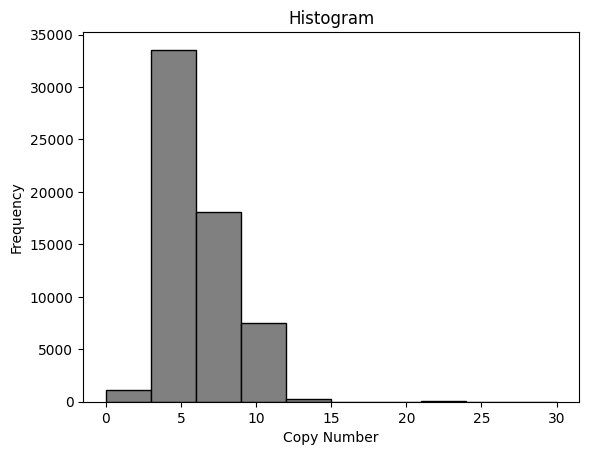

In [112]:
plt.hist(df['copy_number'], color='gray', edgecolor='black')

plt.title('Histogram')
plt.xlabel('Copy Number')
plt.ylabel('Frequency')

plt.show()

In [113]:
cnv_types = df['CNV_Type'].value_counts()
cnv_types

CNV_Type
Amplified    59499
Normal         582
Deleted        542
Name: count, dtype: int64

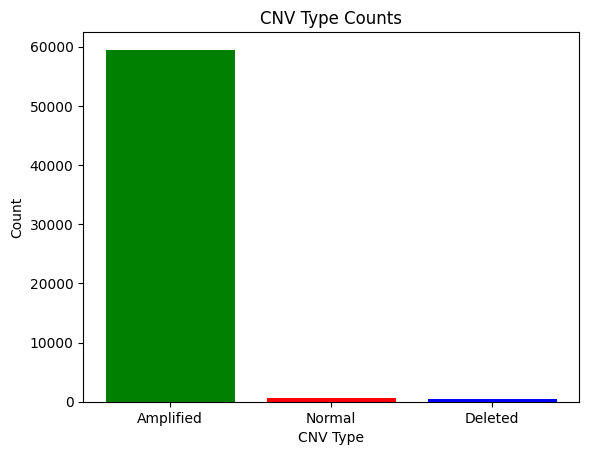

In [114]:
plt.bar(cnv_types.index, cnv_types.values, color=['green', 'red', 'blue'])

plt.title('CNV Type Counts')
plt.xlabel('CNV Type')
plt.ylabel('Count')

plt.show()